## Part 1: Introduction

### 1.1. Import libraries

In [2]:
import pandas as pd
import numpy as np 

# Sklearn modules for data splitting, preprocessing, model building and evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

# Models to be used for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

# Visualization
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


### 1.2. Load Dataset

In [3]:
# df = pd.read_csv("../data/raw/train.csv") # stien til datafilen når det er i IdaData.ipynb
df = pd.read_csv("../../data/raw/train.csv") # stien til datafilen når det er i data.ipynb

## Part 2: Data Preparation

### 2.1. Data Description and Inspection

In [4]:
# Print the shape of the dataframe
df.shape

(1048, 65)

In [5]:
# Print the first few rows of the dataframe
df.head()

,is_dater_male,dater_age,dated_age,age_difference,dater_race,dated_race,are_same_race,same_race_importance_for_dater,same_religion_importance_for_dater,attractiveness_importance_for_dated,...,interests_correlation,expected_satisfaction_of_dater,expected_number_of_likes_of_dater_from_20_people,expected_number_of_dates_for_dater,dater_liked_dated,probability_dated_wants_to_date,already_met_before,dater_wants_to_date,dated_wants_to_date,is_match
0,False,21,27,6,'Asian/Pacific Islander/Asian-American',caucasian,False,2.0,4.0,35.0,...,0.14,3.0,2,4,7.0,6.0,True,True,False,0
1,False,21,22,1,'Asian/Pacific Islander/Asian-American',caucasian,False,2.0,4.0,60.0,...,0.54,3.0,2,4,7.0,5.0,True,True,False,0
2,False,21,23,2,'Asian/Pacific Islander/Asian-American',caucasian,False,2.0,4.0,30.0,...,0.61,3.0,2,4,7.0,6.0,True,True,True,1
3,False,21,24,3,'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',False,2.0,4.0,30.0,...,0.21,3.0,2,4,6.0,6.0,True,True,True,1
4,False,21,25,4,'Asian/Pacific Islander/Asian-American',caucasian,False,2.0,4.0,50.0,...,0.25,3.0,2,4,6.0,5.0,True,False,True,0


In [6]:
# Print the data types of each column
df.dtypes

is_dater_male                         bool
dater_age                            int64
dated_age                            int64
age_difference                       int64
dater_race                          object
                                    ...   
probability_dated_wants_to_date    float64
already_met_before                    bool
dater_wants_to_date                   bool
dated_wants_to_date                   bool
is_match                             int64
Length: 65, dtype: object

### 2.2. Data Preprocessing and Cleaning 

In [7]:
# Remove rows with missing values
df = df.dropna(subset=["is_match"])

In [8]:
# Change the column names to don't use underscores and to use upper first letters
df.columns = [col.replace('_', ' ').title() for col in df.columns]

In [9]:
# print all the column names
print(df.columns.tolist())

['Is Dater Male', 'Dater Age', 'Dated Age', 'Age Difference', 'Dater Race', 'Dated Race', 'Are Same Race', 'Same Race Importance For Dater', 'Same Religion Importance For Dater', 'Attractiveness Importance For Dated', 'Sincerity Importance For Dated', 'Intelligence Importance For Dated', 'Humor Importance For Dated', 'Ambition Importance For Dated', 'Shared Interests Importance For Dated', 'Attractiveness Score Of Dater From Dated', 'Sincerity Score Of Dater From Dated', 'Intelligence Score Of Dater From Dated', 'Humor Score Of Dater From Dated', 'Ambition Score Of Dater From Dated', 'Shared Interests Score Of Dater From Dated', 'Attractiveness Importance For Dater', 'Sincerity Importance For Dater', 'Intelligence Importance For Dater', 'Humor Importance For Dater', 'Ambition Importance For Dater', 'Shared Interests Importance For Dater', 'Self Reported Attractiveness Of Dater', 'Self Reported Sincerity Of Dater', 'Self Reported Intelligence Of Dater', 'Self Reported Humor Of Dater', '

In [10]:
# Store all column names before making changes
cols_before = set(df.columns)

# Drop unwanted columns (gender, religion, etc.)
df = df.drop(
    columns=[
        "Dated Wants To Date",
        "Dater Wants To Date",
        "Same Race Importance For Dater",
        "Same Religion Importance For Dater"
    ],
    errors="ignore"  # ignore errors if any columns are missing
)

# Drop all columns containing the word 'Race'
race_cols = [col for col in df.columns if "Race" in col]
df = df.drop(columns=race_cols, errors="ignore")

# Compare column sets before and after to see which columns were removed for verification
cols_after = set(df.columns)
removed_cols = cols_before - cols_after

# Print removed columns
print("Removed columns:", removed_cols)

Removed columns: {'Dater Wants To Date', 'Dated Wants To Date', 'Same Religion Importance For Dater', 'Dated Race', 'Are Same Race', 'Dater Race', 'Same Race Importance For Dater'}


In [11]:
# Convert categorical variables to numerical dummy variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,Is Dater Male,Dater Age,Dated Age,Age Difference,Attractiveness Importance For Dated,Sincerity Importance For Dated,Intelligence Importance For Dated,Humor Importance For Dated,Ambition Importance For Dated,Shared Interests Importance For Dated,...,Dater Interest In Shopping,Dater Interest In Yoga,Interests Correlation,Expected Satisfaction Of Dater,Expected Number Of Likes Of Dater From 20 People,Expected Number Of Dates For Dater,Dater Liked Dated,Probability Dated Wants To Date,Already Met Before,Is Match
0,False,21,27,6,35.0,20.0,20.0,20.0,0.0,5.0,...,8.0,1.0,0.14,3.0,2,4,7.0,6.0,True,0
1,False,21,22,1,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,1.0,0.54,3.0,2,4,7.0,5.0,True,0
2,False,21,23,2,30.0,5.0,15.0,40.0,5.0,5.0,...,8.0,1.0,0.61,3.0,2,4,7.0,6.0,True,1
3,False,21,24,3,30.0,10.0,20.0,10.0,10.0,20.0,...,8.0,1.0,0.21,3.0,2,4,6.0,6.0,True,1
4,False,21,25,4,50.0,0.0,30.0,10.0,0.0,10.0,...,8.0,1.0,0.25,3.0,2,4,6.0,5.0,True,0


In [12]:
# Print the shape of the dataframe after cleaning
df.shape

(1048, 58)

In [13]:
# Get summary statistics of the dataframe
df.describe()

,Dater Age,Dated Age,Age Difference,Attractiveness Importance For Dated,Sincerity Importance For Dated,Intelligence Importance For Dated,Humor Importance For Dated,Ambition Importance For Dated,Shared Interests Importance For Dated,Attractiveness Score Of Dater From Dated,...,Dater Interest In Music,Dater Interest In Shopping,Dater Interest In Yoga,Interests Correlation,Expected Satisfaction Of Dater,Expected Number Of Likes Of Dater From 20 People,Expected Number Of Dates For Dater,Dater Liked Dated,Probability Dated Wants To Date,Is Match
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,25.005725,24.818702,3.032443,23.728235,16.971021,22.255887,17.325029,9.725792,10.333626,6.211355,...,7.710878,5.511450,4.133588,0.154990,5.378817,5.760496,2.844466,6.218034,4.978053,0.177481
std,3.270365,3.180581,2.427732,12.660571,7.450629,7.352106,6.666005,7.073420,6.763784,1.964935,...,1.899931,2.597821,2.696578,0.335816,1.630245,4.954703,2.370152,1.858517,2.269876,0.382258
min,18.000000,18.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,-0.630000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,22.000000,1.000000,15.000000,10.000000,20.000000,10.832500,5.000000,5.000000,5.000000,...,7.000000,4.000000,2.000000,-0.110000,5.000000,2.000000,1.000000,5.000000,3.000000,0.000000
50%,25.000000,25.000000,2.000000,20.000000,18.000000,20.000000,18.180000,10.000000,10.000000,6.000000,...,8.000000,5.000000,3.000000,0.150000,5.000000,4.000000,2.000000,6.000000,5.000000,0.000000
75%,27.000000,27.000000,4.000000,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000,8.000000,...,9.000000,8.000000,7.000000,0.420000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,35.000000,35.000000,14.000000,100.000000,40.000000,50.000000,40.000000,53.000000,30.000000,10.000000,...,10.000000,10.000000,10.000000,0.900000,9.000000,20.000000,10.000000,10.000000,10.000000,1.000000


### 2.3. Split Features and Target Variable

In [14]:
# Split the data into features and target variable
# "Is Match" is the target variable and is binary (0 or 1) indicating if there was a match or not
X = df.drop("Is Match", axis=1)
y = df["Is Match"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20, # the dataset is small, so use 20% for testing
    stratify=y,
    random_state=42
)

print(f"Train: {len(X_train)}, Test: {len(X_test)}")

# Define K-fold cross-validation on the training data
# This 'cv' object will be used later when training/evaluating models
# CV means cross-validation
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

Train: 838, Test: 210


## Part 3: Modelling

### 3.1. Baseline Model

=== DummyClassifier (Most Frequent) ===
Accuracy:  0.824
Precision: 0.000
Recall:    0.000
F1-score:  0.000

Classification report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       173
           1       0.00      0.00      0.00        37

    accuracy                           0.82       210
   macro avg       0.41      0.50      0.45       210
weighted avg       0.68      0.82      0.74       210

Confusion matrix:
[[173   0]
 [ 37   0]]


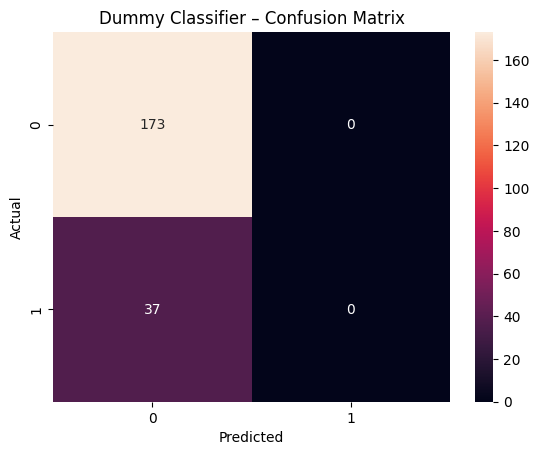

In [15]:
# Baseline model: always predicts the most frequent class in y_train
dummy_clf = DummyClassifier(strategy='most_frequent')

# Train on the *original* training data
dummy_clf.fit(X_train, y_train)

# Predict on test data
y_pred_dummy = dummy_clf.predict(X_test)

# Metrics
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, zero_division=0)
recall_dummy = recall_score(y_test, y_pred_dummy, zero_division=0)
f1_dummy = f1_score(y_test, y_pred_dummy, zero_division=0)

print("=== DummyClassifier (Most Frequent) ===")
print(f"Accuracy:  {accuracy_dummy:.3f}")
print(f"Precision: {precision_dummy:.3f}")
print(f"Recall:    {recall_dummy:.3f}")
print(f"F1-score:  {f1_dummy:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred_dummy, zero_division=0))

# Confusion matrix
cm_dummy = confusion_matrix(y_test, y_pred_dummy)
print("Confusion matrix:")
print(cm_dummy)

sns.heatmap(cm_dummy, annot=True, fmt="d")
plt.title("Dummy Classifier – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 3.2. Logistic Regression

#### 3.2.1. Logistic Regression with Cross-Validation

In [31]:
# Build a pipeline: scaling + model
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=1000))
])

# Run cross-validation on the training data with the different scoring metrics
# Accuracy
lr_acc_scores = cross_val_score(
    lr_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# F1-score
lr_f1_scores = cross_val_score(
    lr_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="f1"
)

# Recall
lr_recall_scores = cross_val_score(
    lr_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="recall"
)

# Precision
lr_precision_scores = cross_val_score(
    lr_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="precision"
)

# Print the cross-validation scores
print("Logistic Regression CV Accuracy Scores:", lr_acc_scores)
print("Logistic Regression mean CV Accuracy Score:", lr_acc_scores.mean())

print("Logistic Regression CV F1 Scores:", lr_f1_scores)
print("Logistic Regression mean CV F1 Score:", lr_f1_scores.mean())

print("Logistic Regression CV Recall Scores:", lr_recall_scores)
print("Logistic Regression mean CV Recall Score:", lr_recall_scores.mean())

print("Logistic Regression CV Precision Scores:", lr_precision_scores)
print("Logistic Regression mean CV Precision Score:", lr_precision_scores.mean())

Logistic Regression CV Accuracy Scores: [0.85119048 0.8452381  0.83928571 0.85628743 0.86227545]
Logistic Regression mean CV Accuracy Score: 0.8508554319931564
Logistic Regression CV F1 Scores: [0.48979592 0.45833333 0.55737705 0.52       0.58181818]
Logistic Regression mean CV F1 Score: 0.5214648965398381
Logistic Regression CV Recall Scores: [0.4        0.36666667 0.56666667 0.44827586 0.53333333]
Logistic Regression mean CV Recall Score: 0.4629885057471264
Logistic Regression CV Precision Scores: [0.63157895 0.61111111 0.5483871  0.61904762 0.64      ]
Logistic Regression mean CV Precision Score: 0.610024954860269


#### 3.2.2. Fine-Tune Logistic Regression with GridSearchCV

In [32]:
# Hyperparameter grid
lr_param_grid = {
    "log_reg__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "log_reg__penalty": ["l1", "l2"],
    "log_reg__solver": ["liblinear", "saga"],
    "log_reg__class_weight": [None, "balanced"],
}

# Evaluate several metrics and choose which one to optimize (refit)
scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "recall": "recall", 
    "precision": "precision"
}

# Set up GridSearchCV with multiple scoring metrics
lr_grid = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=lr_param_grid,
    cv=cv,
    scoring=scoring,
    refit="f1",                
    return_train_score=True,
    n_jobs=-1
)

# Fit the GridSearchCV to the training data
lr_grid.fit(X_train, y_train)

# Report best parameters and best score for the refit metric (F1)
print("Best params:", lr_grid.best_params_)
print("Best CV F1 (refit metric):", lr_grid.best_score_)


# Also report best scores for the other metrics for the selected best_index_
best_i = lr_grid.best_index_

# Get the cross-validation results
cvres = lr_grid.cv_results_

# Print CV scores for all metrics at the best F1 index
print("CV Accuracy at best F1:", cvres["mean_test_accuracy"][best_i])
print("CV Recall at best F1:",   cvres["mean_test_recall"][best_i])
print("CV F1 at best F1:",       cvres["mean_test_f1"][best_i])
print("CV Precision at best F1:",  cvres["mean_test_precision"][best_i])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_

Best params: {'log_reg__C': 0.1, 'log_reg__class_weight': 'balanced', 'log_reg__penalty': 'l1', 'log_reg__solver': 'saga'}
Best CV F1 (refit metric): 0.5516535719979048
CV Accuracy at best F1: 0.7791844881665242
CV Recall at best F1: 0.7581609195402299
CV F1 at best F1: 0.5516535719979048
CV Precision at best F1: 0.436980056980057


#### 3.3. Decision Tree

In [23]:
# Decision Tree without scaling (tree models are scale-invariant)
dt_model = DecisionTreeClassifier(
    random_state=42
)

# Run cross-validation on the training data for performance evaluation
dt_cv_scores = cross_val_score(
    dt_model,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# Print Decision Tree CV scores
print("Decision Tree CV scores:", dt_cv_scores)
print("Decision Tree mean CV score:", dt_cv_scores.mean())

Decision Tree CV scores: [0.83928571 0.83928571 0.79166667 0.78443114 0.76047904]
Decision Tree mean CV score: 0.8030296549757627


##### 3.3.1. Reduced Decision Tree for Visualization

In [24]:
# Create a reduced Decision Tree for visualization with max depth of 3
dtree_small = DecisionTreeClassifier(
    random_state=42,
    max_depth=3
)

# Fit the reduced Decision Tree model on the training data
dtree_small.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

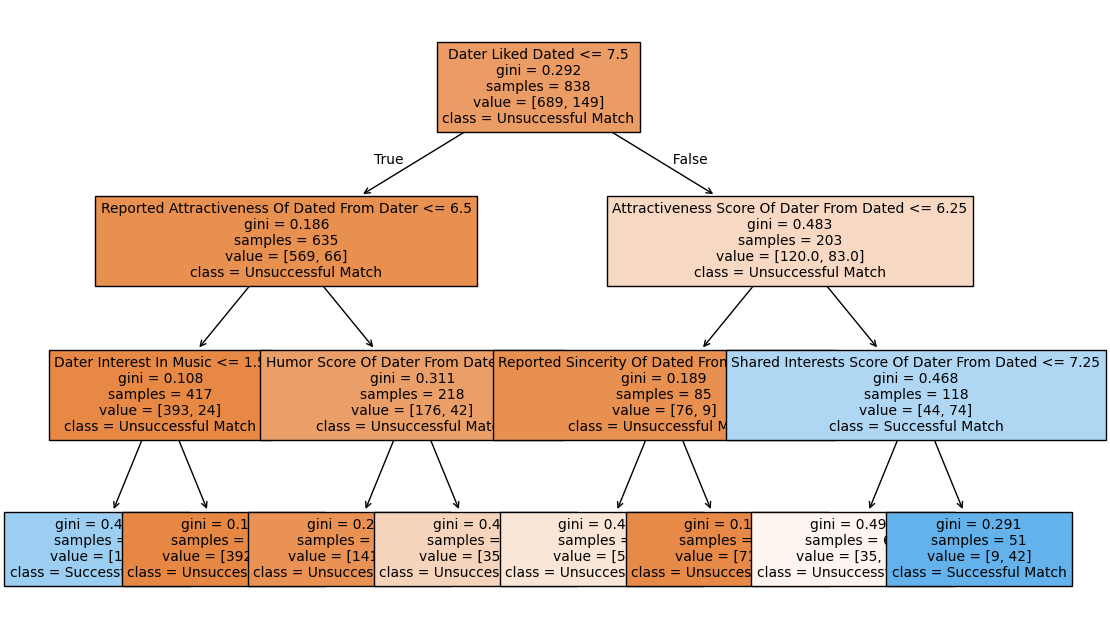

In [25]:
# Visualize the Decision Tree
# Create a figure with specified size
plt.figure(figsize=(13, 8))

# Plot the tree
tree.plot_tree(
    dtree_small,
class_names=["Unsuccessful Match", "Successful Match"],
    feature_names=list(X_train.columns),
    filled=True,
    fontsize=10
)

# Save the figure
plt.savefig("reduced_tree.png", bbox_inches="tight")

# Show the plot
plt.show()

#### 3.3.2. Fine-Tune Decision Tree with GridSearchCV


In [26]:
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "class_weight": [None, "balanced"]
}

# Set up GridSearchCV
dt_grid = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)

# Fit the grid search on the training data
dt_grid.fit(X_train, y_train)

# Print best parameters and best CV score
print("Best parameters:", dt_grid.best_params_)
print("Best CV score:", dt_grid.best_score_)

Best parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.8437125748502993


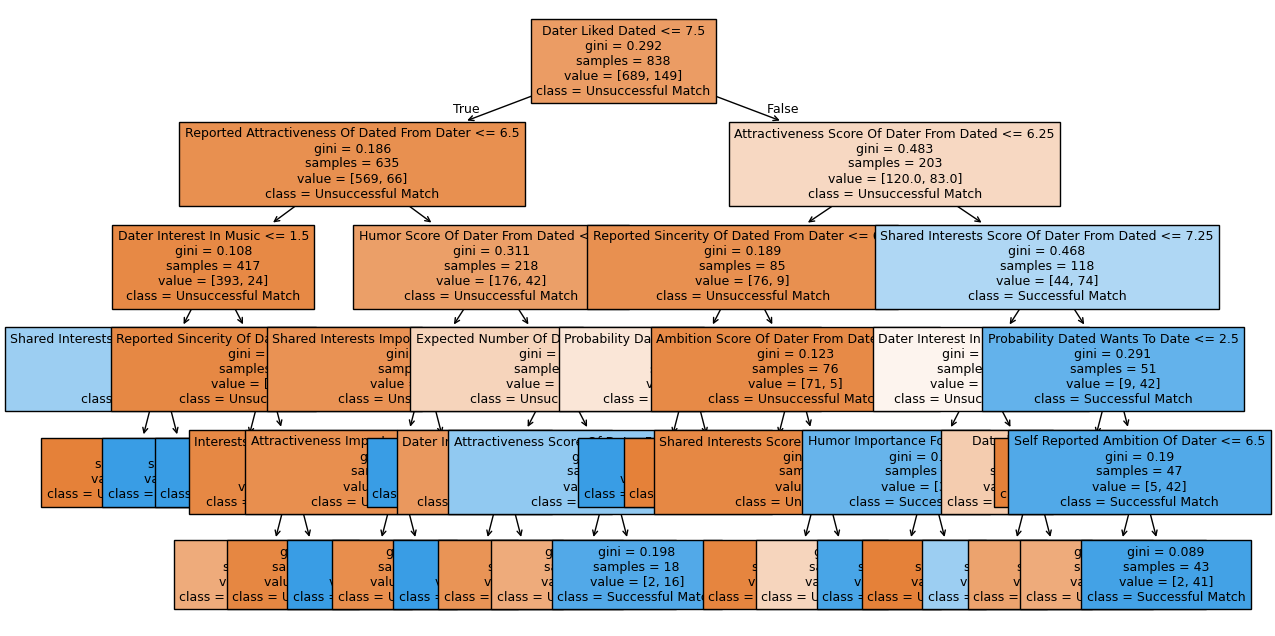

In [27]:
# Visualize the Decision Tree
best_dt = dt_grid.best_estimator_

plt.figure(figsize=(14, 8))
tree.plot_tree(
    best_dt,
    feature_names=list(X_train.columns),
    class_names=["Unsuccessful Match", "Successful Match"],
    filled=True,
    fontsize=9
)
plt.show()

#### 3.4. Random Forest

In [37]:
# Random Forest without scaling
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Accuracy
RF_acc_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# F1-score
rf_f1_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=cv,
    scoring="f1"
)

# Recall
rf_recall_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=cv,
    scoring="recall"
)

# Precision
knn_prec_scores = cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=cv,
    scoring="precision"
)

print("KNN CV Accuracy scores:", RF_acc_scores)
print("KNN mean Accuracy:", RF_acc_scores.mean())

print("KNN CV F1 scores:", rf_f1_scores)
print("KNN mean F1:", rf_f1_scores.mean())

print("KNN CV Recall scores:", rf_recall_scores)
print("KNN mean Recall:", rf_recall_scores.mean())

print("KNN CV Precision scores:", knn_prec_scores)
print("KNN mean Precision:", knn_prec_scores.mean())

KNN CV Accuracy scores: [0.85119048 0.86904762 0.85119048 0.85628743 0.8502994 ]
KNN mean Accuracy: 0.8556030795551754
KNN CV F1 scores: [0.32432432 0.45       0.3902439  0.5        0.3902439 ]
KNN mean F1: 0.4109624258404746
KNN CV Recall scores: [0.2        0.3        0.26666667 0.4137931  0.26666667]
KNN mean Recall: 0.2894252873563218
KNN CV Precision scores: [0.85714286 0.9        0.72727273 0.63157895 0.72727273]
KNN mean Precision: 0.7686534518113467


#### 3.4.1 Random Forest tuning


In [39]:

# Parameter grid 
rf_param_grid = {
    "n_estimators": [200, 500],                 
    "max_depth": [None, 5, 10, 20],             
    "min_samples_split": [2, 5, 10],            
    "min_samples_leaf": [1, 2, 4],              
    "max_features": ["sqrt", "log2"],            
    "bootstrap": [True]                         
}

# Evaluate several metrics and choose which one to optimize (refit)
rf_scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "recall": "recall",
    "precision": "precision"
}

rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=cv,
    scoring=rf_scoring,
    refit="f1",                
    return_train_score=True,
    n_jobs=-1,
    verbose=3
)

rf_grid.fit(X_train, y_train)

print("Best params:", rf_grid.best_params_)
print("Best CV F1 (refit metric):", rf_grid.best_score_)

# Also report best scores for the other metrics for the selected best_index_
rf_best_i = rf_grid.best_index_
rf_cvres = rf_grid.cv_results_

print("CV Accuracy at best F1:", rf_cvres["mean_test_accuracy"][rf_best_i])
print("CV Recall at best F1:",   rf_cvres["mean_test_recall"][rf_best_i])
print("CV F1 at best F1:",       rf_cvres["mean_test_f1"][rf_best_i])
print("CV Precision at best F1:",rf_cvres["mean_test_precision"][rf_best_i])



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV F1 (refit metric): 0.4345046122856503
CV Accuracy at best F1: 0.8568006843455945
CV Recall at best F1: 0.3160919540229885
CV F1 at best F1: 0.4345046122856503
CV Precision at best F1: 0.743939393939394


#### 3.5. K-Nearest Neighbors

In [30]:
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(
        n_neighbors=15,
        weights="distance",
        p=2
    ))
])

# Accuracy
knn_acc_scores = cross_val_score(
    knn_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="accuracy"
)

# F1-score
knn_f1_scores = cross_val_score(
    knn_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="f1"
)

# Recall
knn_recall_scores = cross_val_score(
    knn_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="recall"
)

# precision
knn_precision_scores = cross_val_score(
    knn_pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring="precision"
)


print("KNN CV Accuracy scores:", knn_acc_scores)
print("KNN mean Accuracy:", knn_acc_scores.mean())

print("KNN CV F1 scores:", knn_f1_scores)
print("KNN mean F1:", knn_f1_scores.mean())

print("KNN CV Recall scores:", knn_recall_scores)
print("KNN mean Recall:", knn_recall_scores.mean())

print("KNN CV Precision scores:", knn_precision_scores)
print("KNN mean Precision:", knn_precision_scores.mean())

KNN CV Accuracy scores: [0.83333333 0.85119048 0.83928571 0.84431138 0.8502994 ]
KNN mean Accuracy: 0.8436840604505275
KNN CV F1 scores: [0.125      0.32432432 0.27027027 0.27777778 0.32432432]
KNN mean F1: 0.26433933933933934
KNN CV Recall scores: [0.06666667 0.2        0.16666667 0.17241379 0.2       ]
KNN mean Recall: 0.16114942528735635
KNN CV Precision scores: [1.         0.85714286 0.71428571 0.71428571 0.85714286]
KNN mean Precision: 0.8285714285714286


### 3.5.1 KNN tuning


In [ ]:
knn_param_grid = {
    "scaler": [StandardScaler(), RobustScaler(), "passthrough"],
    "knn__n_neighbors": [1,2,3, 6, 9, 12, 15, 19, 24, 48, 96],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2],  # 1=Manhattan, 2=Euclidean
}

# Evaluate several metrics and choose which one to optimize (refit)
knn_scoring = {
    "accuracy": "accuracy",
    "f1": "f1",
    "recall": "recall",
    "precision": "precision"
}

KNN_grid = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid,
    cv=cv,
    scoring=knn_scoring,
    refit="f1",                
    return_train_score=True,
    n_jobs=-1,
    verbose=3
)

KNN_grid.fit(X_train, y_train)

print("Best params:", KNN_grid.best_params_)
print("Best CV F1 (refit metric):", KNN_grid.best_score_)

# Also report best scores for the other metrics for the selected best_index_
knn_best_i = KNN_grid.best_index_
knn_cvres = KNN_grid.cv_results_

print("CV Accuracy at best F1:", knn_cvres["mean_test_accuracy"][knn_best_i])
print("CV Recall at best F1:",   knn_cvres["mean_test_recall"][knn_best_i])
print("CV F1 at best F1:",       knn_cvres["mean_test_f1"][knn_best_i])
print("CV Precision at best F1:",knn_cvres["mean_test_precision"][knn_best_i])

Fitting 5 folds for each of 132 candidates, totalling 660 fits
Best params: {'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform', 'scaler': StandardScaler()}
Best CV F1 (refit metric): 0.3772222671373775
CV Accuracy at best F1: 0.7791916167664671
CV Recall at best F1: 0.3754022988505747
CV F1 at best F1: 0.3772222671373775
CV Precision at best F1: 0.3853796296296296


### 4. Results and Evaluation
#### 4.1. Results From the Models

In [32]:
# Collect results from the models
# Results before hyperparameter tuning
results_before = {
    "Logistic Regression": lr_cv_scores.mean(),
    "Decision Tree": dt_cv_scores.mean(),
    "Random Forest": rf_cv_scores.mean(),
    "KNN": knn_cv_scores.mean()
}

# Results after hyperparameter tuning - using accuracy
results_after_accuracy = {
    "Logistic Regression": lr_grid_accuracy.best_score_,
    "Decision Tree": 0,
    "Random Forest": rf_grid.best_score_,
    "KNN": KNN_grid.best_score_
}

# Results after hyperparameter tuning - using recall
results_after_recall = {
    "Logistic Regression": lr_grid_recall.best_score_,
    "Decision Tree": 0,
    "Random Forest": 0,
    "KNN": 0
}

# Results after hyperparameter tuning - using f1-score
results_after_fi = {
    "Logistic Regression": lr_grid_f1.best_score_,
    "Decision Tree": 0,
    "Random Forest": 0,
    "KNN": 0
}

# Convert to a table
results_table = pd.DataFrame({
    "Model": list(results_before.keys()),
    "Accuracy Before Tuning": [round(v, 4) for v in results_before.values()],
    "Accuracy After Tuning": [round(v, 4) for v in results_after_accuracy.values()],
    "Recall After Tuning": [round(v, 4) for v in results_after_recall.values()],
    "F1-Score After Tuning": [round(v, 4) for v in results_after_fi.values()]
})

# Display results
results_table.reset_index(drop=True)

NameError: name 'rf_cv_scores' is not defined

### ?. Test Performance